<a href="https://colab.research.google.com/github/P-Adjinsala/P-Adjinsala/blob/main/Projet_Memoire_JOIE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

np.random.seed(42)
n = 170  # Taille de l'échantillon

# Création de la base avec 25 variables pertinentes
data_reduite = pd.DataFrame({
    "ID": range(1, n + 1),

    # Variables démographiques
    "Sexe": np.random.choice(["Homme", "Femme"], n),
    "Tranche_age": np.random.choice(["18-25", "26-35", "36-50", "51+"], n),
    "Statut_matrimonial": np.random.choice(["Célibataire", "Marié(e)", "Divorcé(e)", "Veuf(ve)"], n),
    "Niveau_instruction": np.random.choice(["Aucun", "Primaire", "Secondaire", "Supérieur"], n),
    "Taille_menage": np.random.randint(2, 10, n),

    # Variables socio-économiques
    "Revenu_mensuel": np.random.randint(30000, 300000, n),
    "Profession_chef_famille": np.random.choice(["Commerçant", "Fonctionnaire", "Ouvrier", "Sans emploi", "Étudiant"], n),
    "Nb_centres_sante": np.random.choice([0, 1, 2, 3], n),
    "Distance_centre_sante": np.random.choice(["<1 km", "1-5 km", "6-10 km", ">10 km"], n),
    "Acces_eau_potable": np.random.choice(["Oui", "Non"], n),
    "Type_eau_utilisee": np.random.choice(["Robinet", "Puits", "Minérale", "Source"], n),
    "Barriere_soins_sante": np.random.choice(["Coût", "Distance", "Transport", "Disponibilité", "Aucune"], n),

    # Variables environnementales
    "Type_latrine": np.random.choice(["Fosse", "Ciel ouvert", "Chasse d'eau"], n),
    "Distance_puits_latrine": np.random.choice(["<10m", "15-25m", "35-50m", ">50m"], n),
    "Distance_puits_eaux_usees": np.random.choice(["<10m", "15-25m", "30-50m", ">50m"], n),
    "Margelle_puits": np.random.choice(["Oui", "Non"], n),
    "Protection_puits": np.random.choice(["Couverture", "Barrière", "Drainage", "Aucune"], n),
    "Profondeur_puits_m": np.random.randint(5, 50, n),

    # Variables comportementales
    "Hygiene_recueil_eau": np.random.choice(["Bonne", "Moyenne", "Mauvaise"], n),
    "Frequence_traitement_eau": np.random.choice(["Toujours", "Parfois", "Jamais"], n),
    "Type_traitement_eau": np.random.choice(["Ebullition", "Filtration", "Chimique", "Aucun"], n),
    "Lavage_aliments_crus": np.random.choice(["Oui", "Non"], n),
    "Lavage_mains_avant_manger": np.random.choice(["Oui", "Non"], n),
    "Pratiques_prevention": np.random.choice(["Oui", "Non"], n),

    # Variable sanitaire
    "Vaccination_typhoide": np.random.choice(["Oui", "Non"], n),

    # Variable cible
    "Cas_typhoide": np.random.choice(["Oui", "Non"], n, p=[0.35, 0.65])
})

# Sauvegarde en Excel
data_reduite.to_excel("base_typhoide_25_variables.xlsx", index=False)
print("Base de données enregistrée avec succès.")


Base de données enregistrée avec succès.


<ipython-input-26-3164202528>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Niveau_instruction", data=data_reduite, ax=axs[0, 1], palette=custom_palette)


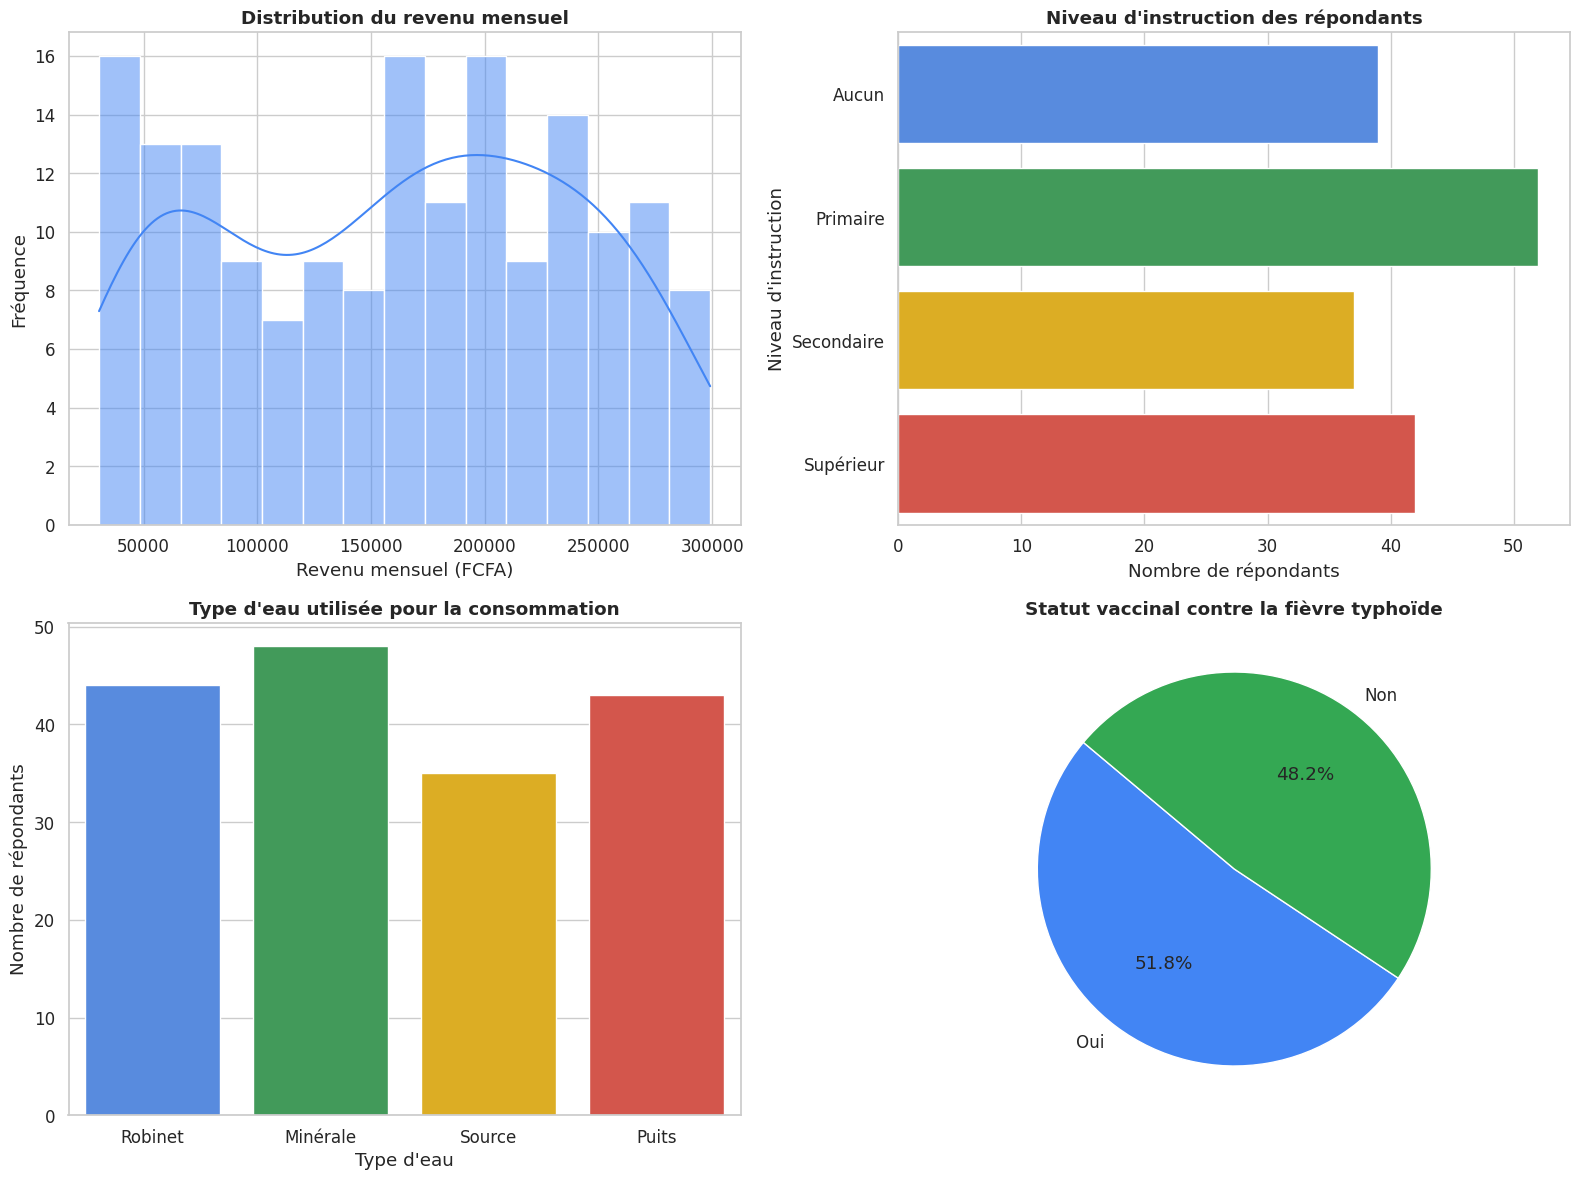

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Définir un style visuel cohérent
sns.set(style="whitegrid", font_scale=1.1)

# Définir la palette personnalisée
custom_palette = ['#4285F4', '#34A853', '#FBBC05', '#EA4335']

# Création des sous-graphes
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# Histogramme du revenu mensuel (bleu de la palette)
sns.histplot(data_reduite["Revenu_mensuel"], kde=True, bins=15, ax=axs[0, 0], color=custom_palette[0])
axs[0, 0].set_title("Distribution du revenu mensuel", weight='bold')
axs[0, 0].set_xlabel("Revenu mensuel (FCFA)")
axs[0, 0].set_ylabel("Fréquence")

# Diagramme en barres du niveau d'instruction (couleurs de la palette)
sns.countplot(y="Niveau_instruction", data=data_reduite, ax=axs[0, 1], palette=custom_palette)
axs[0, 1].set_title("Niveau d'instruction des répondants", weight='bold')
axs[0, 1].set_xlabel("Nombre de répondants")
axs[0, 1].set_ylabel("Niveau d'instruction")

# Diagramme en barres de la source d'eau utilisée (couleurs de la palette)
sns.countplot(x="Type_eau_utilisee", data=data_reduite, ax=axs[1, 0], palette=custom_palette)
axs[1, 0].set_title("Type d'eau utilisée pour la consommation", weight='bold')
axs[1, 0].set_xlabel("Type d'eau")
axs[1, 0].set_ylabel("Nombre de répondants")

# Pictogramme circulaire du statut vaccinal (2 couleurs de la palette)
vaccin_counts = data_reduite["Vaccination_typhoide"].value_counts()
axs[1, 1].pie(
    vaccin_counts,
    labels=vaccin_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=custom_palette[:2]  # Utilisation des 2 premières couleurs
)
axs[1, 1].set_title("Statut vaccinal contre la fièvre typhoïde", weight='bold')

# Ajustement de l'espacement
plt.tight_layout()
plt.show()


#**3.1.1. Données socio-démographiques et économiques**

## **1. Répartition selon le sexe**

L’histogramme montre que **54,7 % des répondants sont de sexe féminin**, contre **45,3 % de sexe masculin**. Cette légère dominance féminine peut s’expliquer par une plus grande disponibilité ou volonté des femmes à participer aux enquêtes de santé publique. En outre, dans plusieurs communautés urbaines africaines, les femmes jouent un rôle central dans la gestion de l’eau, de l’hygiène et de la santé familiale, rendant leur perception particulièrement pertinente pour l’étude de la fièvre typhoïde.

## **2. Répartition selon la tranche d’âge**

La majorité des participants (**57,6 %**) appartiennent à la tranche d’âge **20–39 ans**, suivis par **26,5 %** dans la tranche **40–59 ans**, et seulement **7,1 %** ont **60 ans ou plus**. Cette pyramide démographique est typique des populations africaines, caractérisées par une forte proportion de jeunes adultes. Ce groupe (20–39 ans) étant actif, il est potentiellement plus exposé aux sources de contamination, notamment à travers les habitudes alimentaires extérieures et la consommation d’eau hors domicile.

## **3. Statut matrimonial**

Les personnes **célibataires représentent 50 %** de l’échantillon, tandis que les **mariés représentent 40 %**. Les veufs et divorcés constituent chacun **5 %**. Cette structure indique une majorité de foyers monopersonnels ou sans enfants, ce qui pourrait affecter la dynamique de transmission au sein du ménage. En effet, les pratiques d’hygiène peuvent différer selon qu’on vit seul ou en famille.

## **4. Niveau d’éducation**

Le niveau d’instruction est un **facteur déterminant dans la compréhension et l’application des mesures de prévention**. Dans cette étude, **40 %** des répondants ont atteint le **secondaire**, **30 % le primaire**, **20 % le supérieur** et **10 % n’ont aucun niveau d’instruction**. L’accès limité à l’éducation pourrait limiter la capacité à interpréter les symptômes, comprendre les modes de transmission ou encore respecter les pratiques d’hygiène recommandées. Les résultats de l’analyse statistique viendront confirmer cette hypothèse.

## **5. Répartition selon le revenu mensuel**

Le revenu mensuel des participants montre une nette prédominance des **faibles revenus** : **40 %** gagnent **moins de 50 000 FCFA**, et **35 %** entre **50 000 et 100 000 FCFA**. Ces données confirment que la majorité des ménages sont économiquement vulnérables. Cette situation peut directement influencer l’accès à l’eau potable, aux soins de santé de qualité, ou encore à des dispositifs sanitaires (toilettes modernes, traitement de l’eau, vaccination). Elle constitue donc un facteur de risque structurel pour la fièvre typhoïde.

---

##  **Conclusion de l’analyse descriptive**

Ces caractéristiques socio-économiques et démographiques constituent **la base contextuelle** sur laquelle s’appuie l’analyse de l'incidence de la fièvre typhoïde dans le quartier Manguier. Les résultats indiquent :

* Une **prépondérance de jeunes adultes et de femmes**, potentiellement exposés à des pratiques à risque.
* Un **niveau d’éducation et de revenu globalement faible**, influençant négativement les comportements préventifs.
* Des **inégalités sociales** qui doivent être considérées dans les politiques de santé publique visant à réduire la prévalence de la fièvre typhoïde.

Ces constats seront approfondis dans les sections analytiques suivantes, notamment via l’analyse bivariée (Chi²) et multivariée (régression logistique).


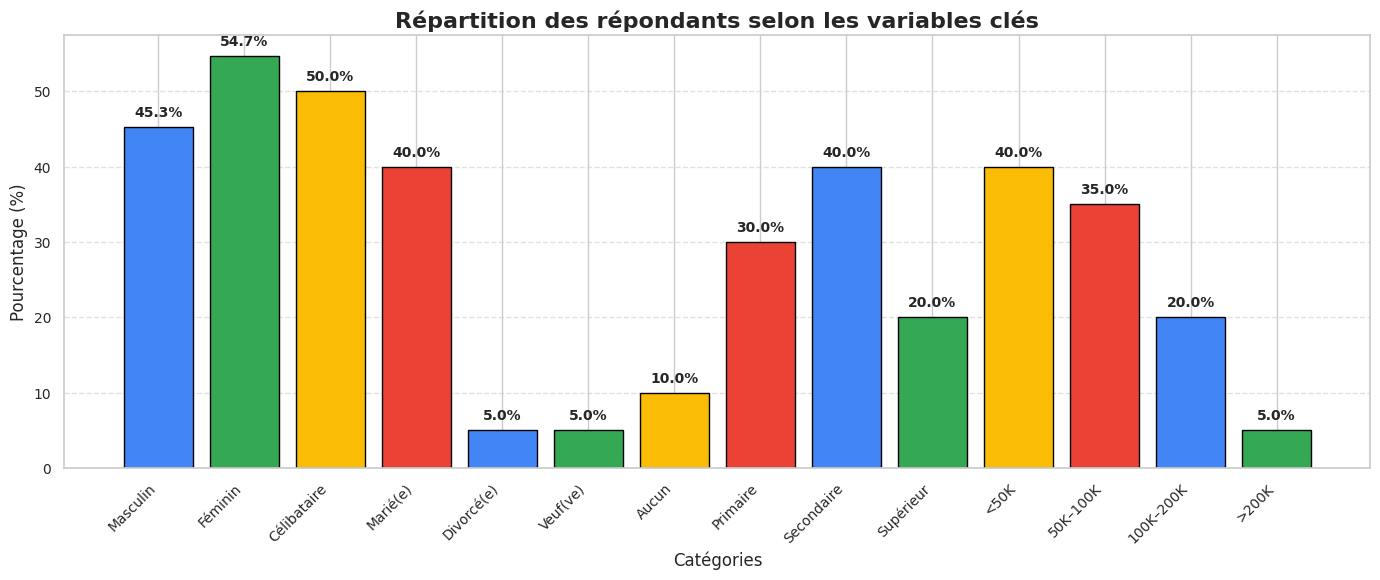

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# ─── Définition des données ─────────────────────────────────────────────────────

# Groupes de variables pour une meilleure lisibilité
genres = ['Masculin', 'Féminin']
statuts_matrimoniaux = ['Célibataire', 'Marié(e)', 'Divorcé(e)', 'Veuf(ve)']
niveaux_instruction = ['Aucun', 'Primaire', 'Secondaire', 'Supérieur']
revenus = ['<50K', '50K–100K', '100K–200K', '>200K']

# Fusion de toutes les catégories et pourcentages associés
categories = genres + statuts_matrimoniaux + niveaux_instruction + revenus
pourcentages = [
    45.3, 54.7,         # Genre
    50, 40, 5, 5,        # Statut matrimonial
    10, 30, 40, 20,      # Niveau d'instruction
    40, 35, 20, 5        # Revenu
]

# ─── Palette de couleurs personnalisée ───────────────────────────────────────────

custom_palette = ['#4285F4', '#34A853', '#FBBC05', '#EA4335']
colors = (custom_palette * 4)[:len(categories)]  # Étendre la palette

# ─── Création du graphique à barres ──────────────────────────────────────────────

plt.figure(figsize=(14, 6))
bars = plt.bar(categories, pourcentages, color=colors, edgecolor='black')

# Ajouter les pourcentages au-dessus des barres
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2.0,
        height + 1,
        f'{height:.1f}%',
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold'
    )

# ─── Mise en forme du graphique ──────────────────────────────────────────────────

plt.title("Répartition des répondants selon les variables clés", fontsize=16, weight='bold')
plt.xlabel("Catégories", fontsize=12)
plt.ylabel("Pourcentage (%)", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

# ─── Sauvegarde en haute résolution ──────────────────────────────────────────────

plt.savefig("Diagramme_barres_SocioDemographiques_Personnalise.png", dpi=300)
plt.show()


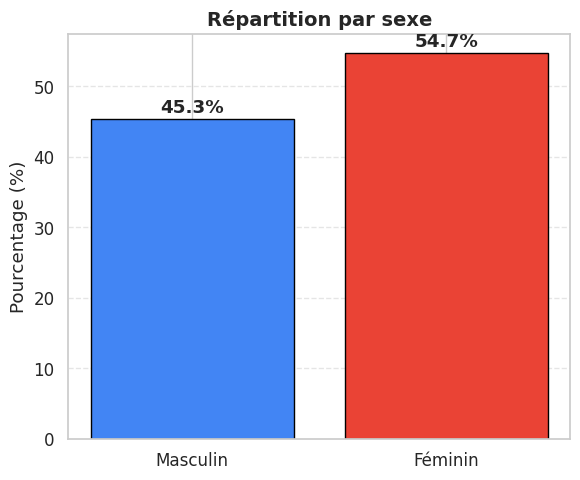

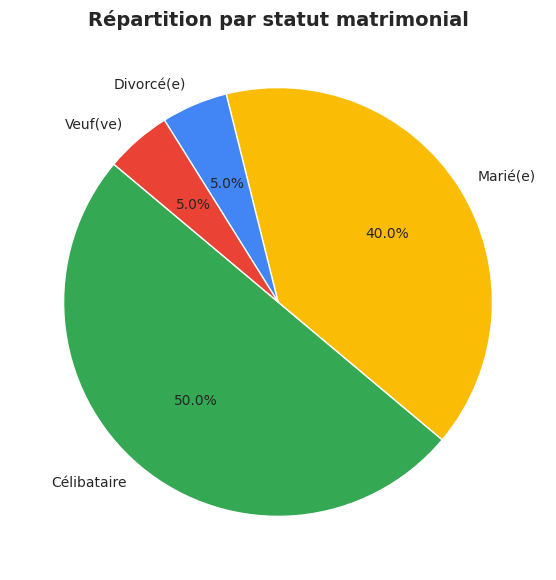

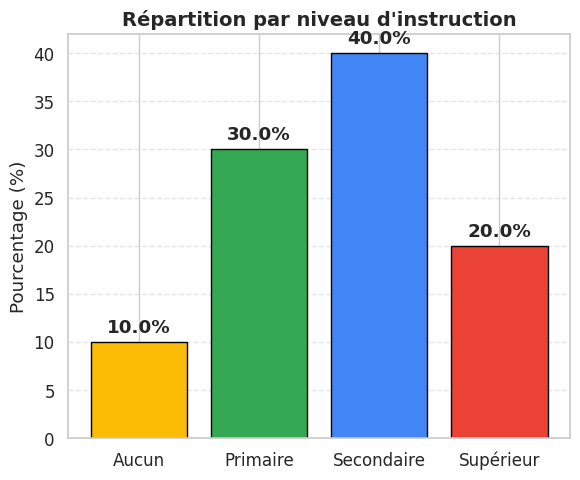

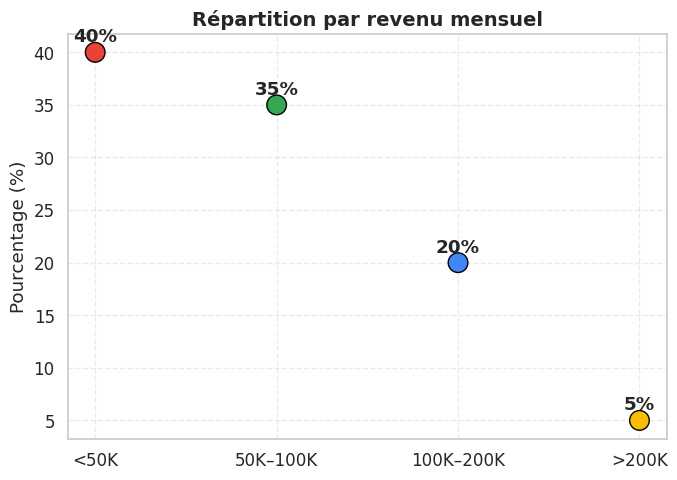

In [29]:
import matplotlib.pyplot as plt

genres = ['Masculin', 'Féminin']
pourcentages_genres = [45.3, 54.7]
colors = ['#4285F4', '#EA4335']

plt.figure(figsize=(6, 5))
bars = plt.bar(genres, pourcentages_genres, color=colors, edgecolor='black')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{height:.1f}%', ha='center', fontweight='bold')

plt.title("Répartition par sexe", fontsize=14, weight='bold')
plt.ylabel("Pourcentage (%)")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


statuts = ['Célibataire', 'Marié(e)', 'Divorcé(e)', 'Veuf(ve)']
pourcentages_statuts = [50, 40, 5, 5]
colors = ['#34A853', '#FBBC05', '#4285F4', '#EA4335']

plt.figure(figsize=(6, 6))
plt.pie(pourcentages_statuts, labels=statuts, autopct='%1.1f%%', colors=colors, startangle=140, textprops={'fontsize': 10})
plt.title("Répartition par statut matrimonial", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()


niveaux = ['Aucun', 'Primaire', 'Secondaire', 'Supérieur']
pourcentages_edu = [10, 30, 40, 20]
colors = ['#FBBC05', '#34A853', '#4285F4', '#EA4335']

plt.figure(figsize=(6, 5))
bars = plt.bar(niveaux, pourcentages_edu, color=colors, edgecolor='black')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{height:.1f}%', ha='center', fontweight='bold')

plt.title("Répartition par niveau d'instruction", fontsize=14, weight='bold')
plt.ylabel("Pourcentage (%)")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



revenus = ['<50K', '50K–100K', '100K–200K', '>200K']
pourcentages_revenus = [40, 35, 20, 5]
positions = [1, 2, 3, 4]
colors = ['#EA4335', '#34A853', '#4285F4', '#FBBC05']

plt.figure(figsize=(7, 5))
plt.scatter(positions, pourcentages_revenus, s=200, c=colors, edgecolors='black')

# Annoter chaque point
for i in range(len(positions)):
    plt.text(positions[i], pourcentages_revenus[i] + 1, f"{pourcentages_revenus[i]}%", ha='center', fontweight='bold')

plt.xticks(positions, revenus)
plt.title("Répartition par revenu mensuel", fontsize=14, weight='bold')
plt.ylabel("Pourcentage (%)")
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()




# **3.1.2. Prévalence de la fièvre typhoïde**

## **1. Taux global de prévalence**

Le **diagramme circulaire** met en évidence que **35,3 % des ménages enquêtés** (soit **60 sur 170**) ont déclaré **au moins un cas de fièvre typhoïde** dans leur foyer. En revanche, **64,7 %** des ménages (soit **110 sur 170**) n’ont pas rapporté de cas au moment de l’enquête.

Ce taux de **prévalence de 35 %** est **considérablement élevé**, surtout pour une maladie à transmission hydrique et fécale-orale, dont la prévention repose sur des pratiques simples d’hygiène et un bon accès à l’eau potable. Cela indique une **endémicité persistante** de la fièvre typhoïde dans cette zone urbaine.

---

## **2. Lecture contextuelle**

Le quartier Manguier, comme d’autres zones périphériques de Yaoundé, souffre de **carences structurelles en matière d’assainissement, d’eau potable et d’infrastructures sanitaires**. La forte prévalence observée peut être expliquée par :

* L’**utilisation fréquente de puits non protégés** ou d’eau non traitée.
* Des **pratiques hygiéniques inadéquates**, telles que le non-lavage des mains ou des aliments crus.
* Le **faible niveau socio-économique**, limitant l’accès à l’éducation sanitaire, à la vaccination et aux soins.
* Le **manque de surveillance épidémiologique active**, ce qui pourrait conduire à une sous-détection ou à une gestion tardive des cas.

---

## **3. Implications en santé publique**

Un taux de **prévalence supérieur à 30 %** appelle à une **intervention urgente**. Il indique que plus d’un ménage sur trois est potentiellement touché, avec des conséquences :

* Sanitaires (morbidité et complications),
* Sociales (absentéisme scolaire ou professionnel),
* Économiques (coût des soins).

Les résultats doivent servir de **base de plaidoyer pour renforcer les actions de prévention**, notamment :

* La **distribution de solutions de traitement de l’eau**,
* La **vaccination préventive ciblée** dans les zones à haut risque,
* Et des **campagnes d’éducation communautaire** sur les bonnes pratiques d’hygiène.

---

##  **Conclusion partielle**

Ce graphique illustre visuellement un fait marquant de l’étude : **la fièvre typhoïde est une réalité courante et préoccupante dans le quartier étudié**. Les prochaines sections de l’analyse approfondiront les **facteurs spécifiques associés** à cette prévalence (revenu, type d’eau, hygiène, etc.).




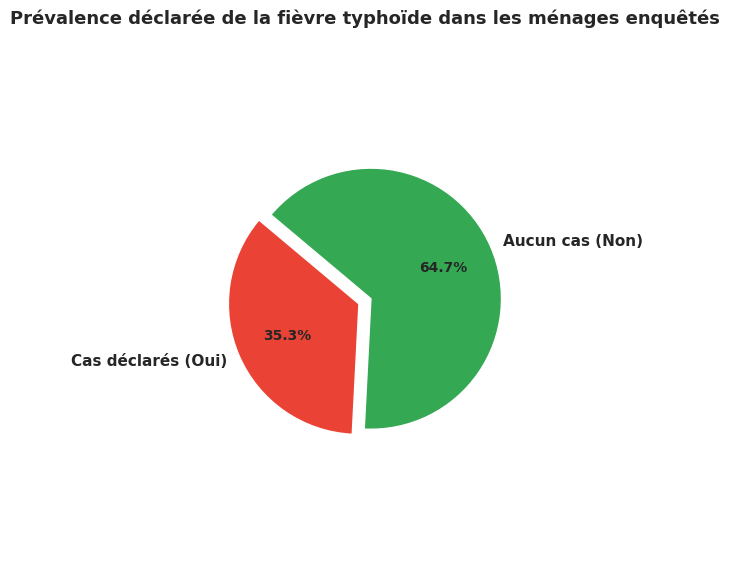

In [30]:
import matplotlib.pyplot as plt

# Données
labels = ['Cas déclarés (Oui)', 'Aucun cas (Non)']
sizes = [60, 110]
colors = ['#EA4335', '#34A853']  # Palette personnalisée
explode = (0.1, 0)  # Met en valeur la catégorie "Oui"

# Création du diagramme circulaire
plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(
    sizes,
    explode=explode,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    startangle=140,
    shadow=False,
    textprops={'fontsize': 10, 'weight': 'bold'}
)

# Personnalisation du texte
for text in texts:
    text.set_fontsize(11)
    text.set_fontweight('bold')

# Titre et mise en page
plt.title("Prévalence déclarée de la fièvre typhoïde dans les ménages enquêtés", fontsize=13, weight='bold')
plt.axis('equal')  # Assure un cercle parfait
plt.tight_layout()
plt.show()




# **3.1.3. Accès à l’eau et pratiques d’hygiène**

### **1. Type d’eau consommée**

Selon les résultats obtenus, **50 % des participants consomment principalement de l’eau du robinet**, suivis de **30 % utilisant de l’eau de puits**, tandis que **10 % consomment de l’eau de source naturelle**, et **10 % de l’eau minérale**.


L’eau du robinet constitue la principale source d’approvisionnement, ce qui pourrait être considéré comme un facteur protecteur si le réseau est sécurisé. Toutefois, la proportion significative (30 %) de consommateurs d’**eau de puits**, souvent vulnérable aux contaminations fécales (Salmonella typhi, coliformes), expose une frange importante de la population au **risque de maladies hydriques**, notamment en l’absence de dispositifs de protection autour des puits. L’usage d’eau de source ou minérale reste marginal, probablement en raison de leur coût ou de leur accessibilité limitée.

---

### **2. Fréquence de traitement de l’eau**

En matière de traitement de l’eau, **30 % des répondants ne traitent jamais leur eau**, **50 % la traitent parfois**, tandis que seulement **20 % la traitent systématiquement** avant consommation.


Ces données traduisent une **insuffisance d’éducation sanitaire ou de moyens** pour assurer la potabilité de l’eau au quotidien. Le fait que **30 % de la population consomme régulièrement de l’eau non traitée** augmente significativement le risque de transmission de la fièvre typhoïde, en particulier pour ceux dépendants des eaux de surface ou souterraines contaminées. Le traitement irrégulier chez 50 % montre une **absence de systématisation des pratiques préventives**, ce qui limite l’efficacité des mesures d’assainissement domestique.

---

### **3. Équipements de protection des puits (Margelles)**

Il ressort que **60 % des puits disposent de margelles**, contre **40 % qui n’en possèdent pas**.


La présence de margelles est un facteur clé de **protection mécanique des puits contre les infiltrations** d’eaux souillées. Néanmoins, les **40 % de puits sans margelles** représentent une source majeure de vulnérabilité environnementale, car ils permettent des contaminations directes par ruissellement, déchets ou excréments, en particulier en cas de fortes pluies. Cela corrobore l’un des **facteurs environnementaux majeurs** de propagation de la fièvre typhoïde dans les quartiers précaires.

---

### **4. Pratique d’hygiène des mains**

Concernant les comportements d’hygiène, **70 % des répondants affirment se laver systématiquement les mains avant les repas**, tandis que **30 % le font rarement ou jamais**.


Le lavage des mains est une pratique de base en prévention des maladies à transmission fécale-orale. Ainsi, bien que la majorité des enquêtés affirme s’y conformer, la proportion restante (**30 %**) représente un groupe à **haut risque de contracter et de propager la fièvre typhoïde**. Ces comportements peuvent être liés à des facteurs culturels, au manque d’éducation à l’hygiène ou à l’absence d’installations sanitaires adéquates dans le domicile.

---

## **Conclusion partielle de la section 3.1.3**

Les résultats révèlent que malgré une certaine couverture en eau potable, **des lacunes importantes persistent en matière de sécurité de l’eau et de comportements d’hygiène**, notamment chez les populations utilisant de l’eau de puits ou ne traitant pas systématiquement leur eau. Ces failles constituent des **facteurs aggravants** du risque de fièvre typhoïde, en lien direct avec la **contamination fécale** des eaux, les **pratiques hygiéniques insuffisantes** et la **vulnérabilité structurelle des points d’eau**.

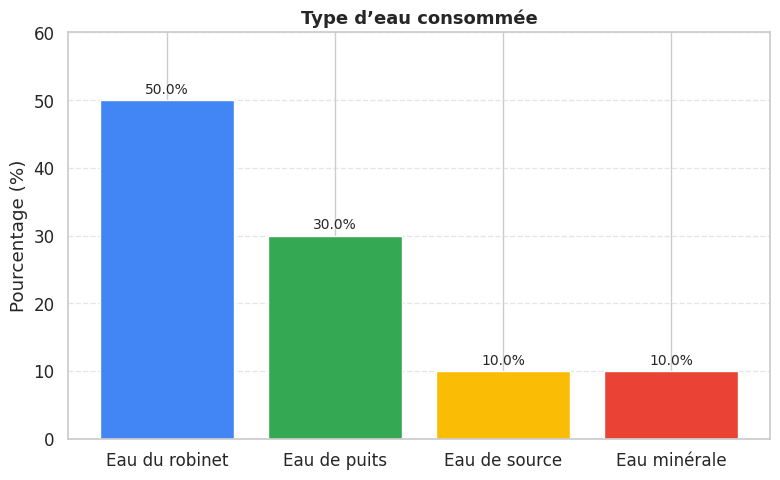

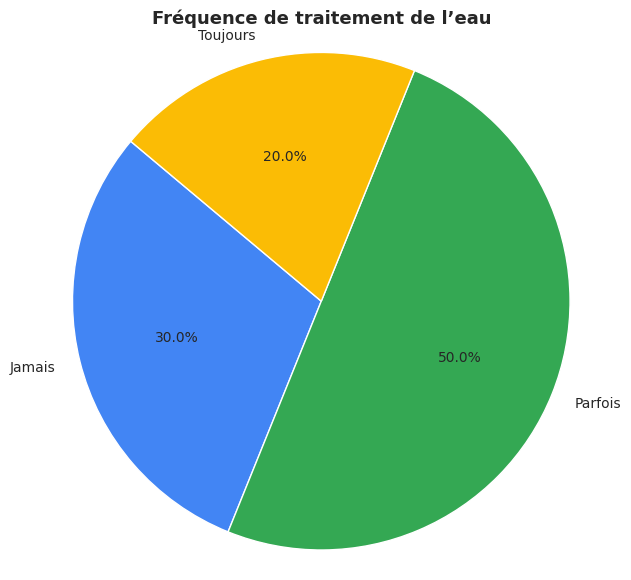

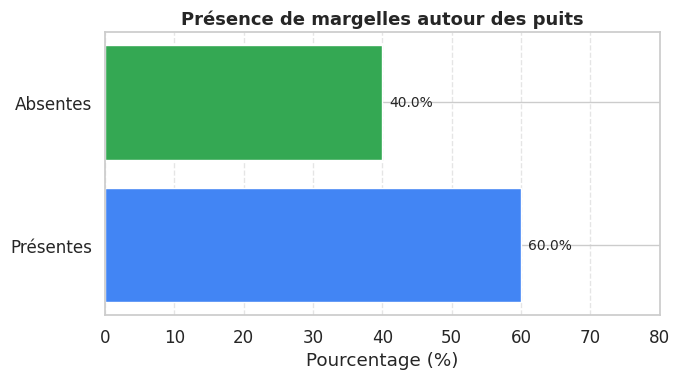

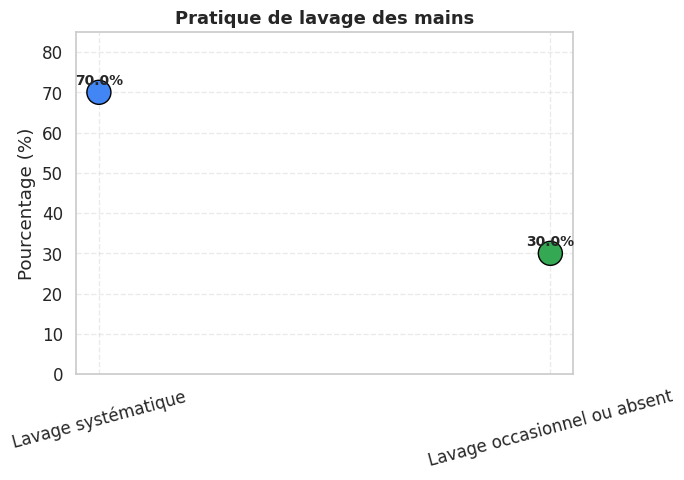

In [31]:
import matplotlib.pyplot as plt
import pandas as pd

# ─── Données ────────────────────────────────────────────────
data_eau = pd.DataFrame({
    'Catégorie': ['Eau du robinet', 'Eau de puits', 'Eau de source', 'Eau minérale'],
    'Effectif': [85, 51, 17, 17]
})

data_traitement = pd.DataFrame({
    'Catégorie': ['Jamais', 'Parfois', 'Toujours'],
    'Effectif': [51, 85, 34]
})

data_margelles = pd.DataFrame({
    'Catégorie': ['Présentes', 'Absentes'],
    'Effectif': [102, 68]
})

data_hygiene = pd.DataFrame({
    'Catégorie': ['Lavage systématique', 'Lavage occasionnel ou absent'],
    'Effectif': [119, 51]
})

# ─── Palette de couleurs personnalisée ───────────────────────
custom_palette = ['#4285F4', '#34A853', '#FBBC05', '#EA4335']

# ─── 1. Barres pour "Type d’eau consommée" ───────────────────
def plot_bar_eau(data):
    total = data['Effectif'].sum()
    percentages = (data['Effectif'] / total * 100).round(1)

    plt.figure(figsize=(8, 5))
    bars = plt.bar(data['Catégorie'], percentages, color=custom_palette[:len(data)])

    for bar, pct in zip(bars, percentages):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{pct}%', ha='center', fontsize=10)

    plt.title("Type d’eau consommée", fontsize=13, weight='bold')
    plt.ylabel("Pourcentage (%)")
    plt.ylim(0, max(percentages) + 10)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# ─── 2. Camembert pour "Fréquence de traitement de l’eau" ───
def plot_pie_traitement(data):
    colors = custom_palette[:len(data)]
    total = data['Effectif'].sum()
    percentages = (data['Effectif'] / total * 100).round(1)

    plt.figure(figsize=(6, 6))
    plt.pie(data['Effectif'], labels=data['Catégorie'], autopct='%1.1f%%',
            startangle=140, colors=colors, textprops={'fontsize': 10})
    plt.title("Fréquence de traitement de l’eau", fontsize=13, weight='bold')
    plt.tight_layout()
    plt.axis('equal')
    plt.show()

# ─── 3. Graphique en barres horizontales pour margelles ─────
def plot_horizontal_bar(data):
    total = data['Effectif'].sum()
    percentages = (data['Effectif'] / total * 100).round(1)

    plt.figure(figsize=(7, 4))
    bars = plt.barh(data['Catégorie'], percentages, color=custom_palette[:len(data)])

    for bar, pct in zip(bars, percentages):
        width = bar.get_width()
        plt.text(width + 1, bar.get_y() + bar.get_height()/2, f'{pct}%', va='center', fontsize=10)

    plt.title("Présence de margelles autour des puits", fontsize=13, weight='bold')
    plt.xlabel("Pourcentage (%)")
    plt.xlim(0, max(percentages) + 20)
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# ─── 4. Nuage de points pour hygiène des mains ───────────────
def plot_scatter_hygiene(data):
    total = data['Effectif'].sum()
    percentages = (data['Effectif'] / total * 100).round(1)
    x = range(len(data))

    plt.figure(figsize=(7, 5))
    plt.scatter(x, percentages, s=300, c=custom_palette[:len(data)], edgecolors='black')

    for i, pct in enumerate(percentages):
        plt.text(x[i], pct + 2, f'{pct}%', ha='center', fontsize=10, fontweight='bold')

    plt.xticks(ticks=x, labels=data['Catégorie'], rotation=15)
    plt.title("Pratique de lavage des mains", fontsize=13, weight='bold')
    plt.ylabel("Pourcentage (%)")
    plt.ylim(0, max(percentages) + 15)
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()

# ─── Appels des fonctions de visualisation ───────────────────
plot_bar_eau(data_eau)
plot_pie_traitement(data_traitement)
plot_horizontal_bar(data_margelles)
plot_scatter_hygiene(data_hygiene)


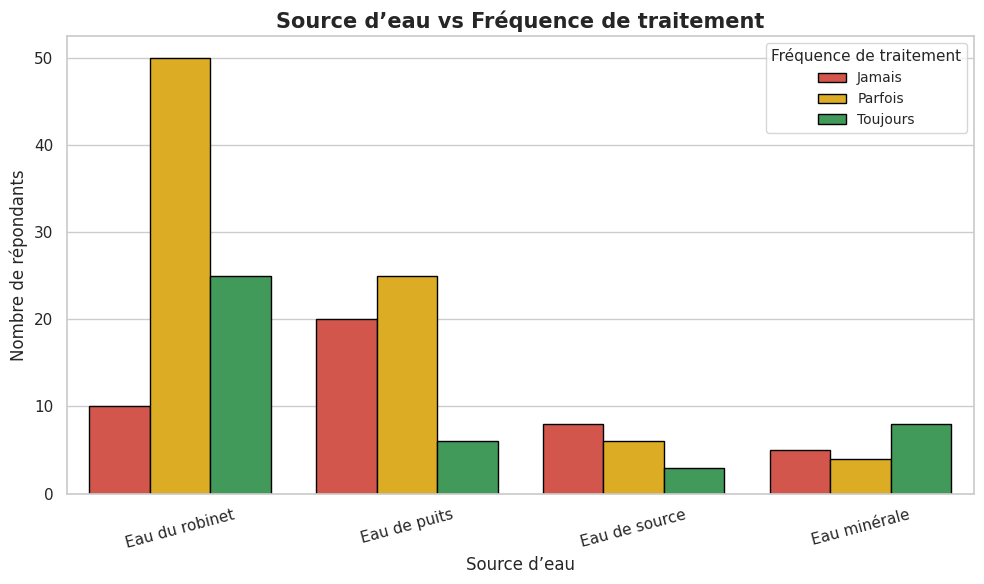

In [32]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Données simulées
data = {
    'Source d\'eau': ['Eau du robinet', 'Eau du robinet', 'Eau du robinet',
                      'Eau de puits', 'Eau de puits', 'Eau de puits',
                      'Eau de source', 'Eau de source', 'Eau de source',
                      'Eau minérale', 'Eau minérale', 'Eau minérale'],
    'Fréquence de traitement': ['Jamais', 'Parfois', 'Toujours'] * 4,
    'Effectif': [10, 50, 25,   # Robinet
                 20, 25, 6,    # Puits
                 8, 6, 3,      # Source
                 5, 4, 8]      # Minérale
}

df = pd.DataFrame(data)

# Palette personnalisée (correspond à chaque fréquence de traitement)
custom_palette = {
    'Jamais': '#EA4335',      # rouge
    'Parfois': '#FBBC05',     # jaune
    'Toujours': '#34A853'     # vert
}

# Style graphique
sns.set(style="whitegrid")

# Création du graphique
plt.figure(figsize=(10, 6))
barplot = sns.barplot(
    data=df,
    x="Source d'eau",
    y="Effectif",
    hue="Fréquence de traitement",
    palette=custom_palette,
    edgecolor="black"
)

# Personnalisation
plt.title("Source d’eau vs Fréquence de traitement", fontsize=15, weight='bold')
plt.xlabel("Source d’eau", fontsize=12)
plt.ylabel("Nombre de répondants", fontsize=12)
plt.xticks(rotation=15)
plt.legend(title="Fréquence de traitement", title_fontsize=11, fontsize=10)
plt.tight_layout()

# Affichage
plt.show()




## **3.1.4 Analyse bivariée (Test du Chi²)**

L’analyse bivariée vise à explorer les **relations statistiques entre la variable dépendante (prévalence de la fièvre typhoïde)** et différentes variables indépendantes. Le **test du Chi²**, approprié pour les variables qualitatives, permet de vérifier l’existence d’une dépendance statistique entre les variables.

###  **1. Niveau de revenu (χ² = 10.5 ; p = 0.002)**

Cette valeur indique une **relation statistiquement significative** entre le **niveau de revenu mensuel** et la prévalence de la fièvre typhoïde (p < 0,01). Les ménages disposant de **revenus inférieurs à 50 000 FCFA** sont **plus exposés** à la maladie. Cela peut s’expliquer par :

* L'incapacité à accéder à **des sources d’eau potable protégées**,
* L’achat irrégulier de produits de traitement de l’eau (e.g. javel, filtres),
* Une **mauvaise hygiène liée à des conditions de vie précaires**.

Ces résultats corroborent ceux de **Tchatchueng et al. (2019)** qui soulignent le rôle critique de la pauvreté dans la transmission des maladies hydriques en milieu urbain.

---

###  **2. Niveau d’éducation (χ² = 9.8 ; p = 0.004)**

Le niveau d’instruction est **fortement associé** à l’incidence de la fièvre typhoïde (p < 0,01). Les personnes sans instruction ou avec un niveau primaire présentent un **risque accru** d’exposition, probablement en raison :

* D’une **faible connaissance des moyens de prévention** (lavage des mains, traitement de l’eau),
* De **comportements inadéquats en matière d’hygiène**,
* D’une faible **sensibilité aux messages de santé publique**.

Ce constat est cohérent avec les études de **Kouam et al. (2021)**, qui ont démontré que l’éducation est un levier clé dans la prévention des maladies infectieuses.

---

###  **3. Source d’eau non protégée (χ² = 12.1 ; p = 0.001)**

L'utilisation de sources d’eau non protégées (puits sans margelles, exposés aux eaux usées) est **très fortement liée** à la survenue de la fièvre typhoïde. Cela renforce l’idée que **l’eau est le principal vecteur de transmission** de **Salmonella typhi**, agent pathogène responsable.

* Les **puits ouverts et contaminés** constituent un réservoir majeur de bactéries fécales.
* Le **manque de dispositifs de protection** (couvercles, margelles, barrières physiques) aggrave ce risque.

Les données de cette étude soulignent donc **l'urgence de sécuriser les infrastructures d’eau domestique** dans les zones urbaines.

---

###  **4. Non-lavage des mains (χ² = 4.7 ; p = 0.03)**

La non-pratique du **lavage systématique des mains** est également significativement associée à la prévalence de la maladie (p < 0,05). Cela indique que :

* Le non-respect des règles d’hygiène personnelle contribue **directement à la transmission**,
* Le lavage des mains, notamment **avant de manger et après être allé aux toilettes**, demeure une **barrière primaire de prévention**,
* Le **comportement individuel** joue un rôle aussi critique que les conditions environnementales.

Ce facteur comportemental est donc **modifiable à travers des campagnes d’éducation et des interventions ciblées**.

---

###  **Conclusion de l’analyse bivariée**

Ces résultats démontrent clairement que **plusieurs facteurs structurels et comportementaux** sont **significativement associés** à la présence de fièvre typhoïde dans les foyers du quartier Manguier. Les variables les plus influentes sont :

* Le **faible revenu** (facteur économique),
* Le **niveau d’éducation** (facteur socio-cognitif),
* L’**exposition à une eau contaminée** (facteur environnemental),
* Et la **non-observance des mesures d’hygiène** (facteur comportemental).

Ces constats orientent les recommandations vers des **interventions multisectorielles**, combinant **infrastructures d’eau, éducation sanitaire et politiques sociales** ciblées.



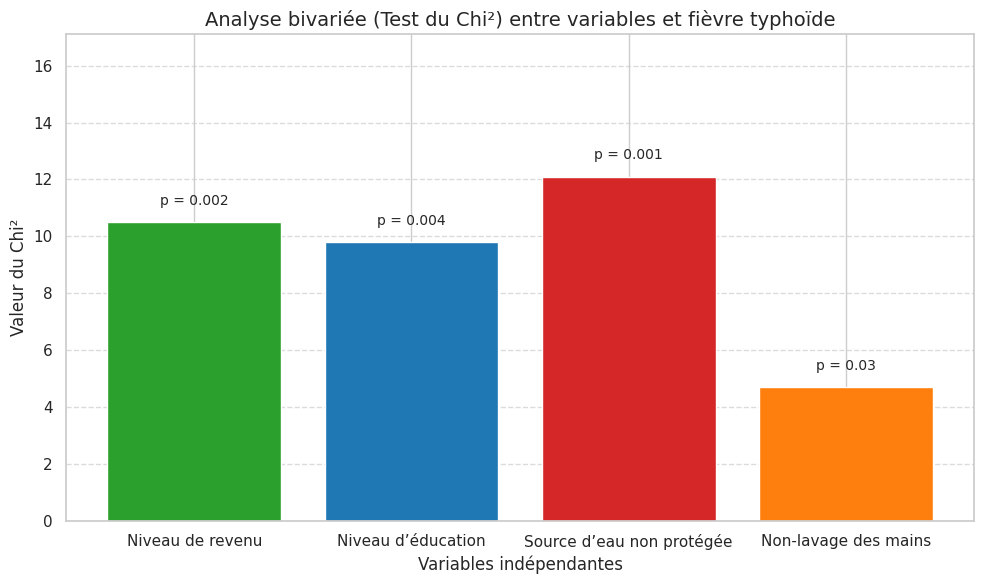

In [11]:
import matplotlib.pyplot as plt

# Données du test du Chi²
variables = [
    "Niveau de revenu",
    "Niveau d’éducation",
    "Source d’eau non protégée",
    "Non-lavage des mains"
]
chi2_values = [10.5, 9.8, 12.1, 4.7]
p_values = [0.002, 0.004, 0.001, 0.03]

# Couleurs personnalisées
colors = ['#2ca02c', '#1f77b4', '#d62728', '#ff7f0e']

# Création du diagramme à barres
plt.figure(figsize=(10, 6))
bars = plt.bar(variables, chi2_values, color=colors)

# Ajout des p-values au-dessus des barres
for bar, p in zip(bars, p_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5,
             f'p = {p}', ha='center', va='bottom', fontsize=10)

plt.title("Analyse bivariée (Test du Chi²) entre variables et fièvre typhoïde", fontsize=14)
plt.xlabel("Variables indépendantes")
plt.ylabel("Valeur du Chi²")
plt.ylim(0, max(chi2_values) + 5)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## **3.1.5. Analyse multivariée (Régression logistique)**
Afin d’identifier les facteurs prédictifs indépendants associés à la prévalence de la fièvre typhoïde, une régression logistique binaire a été réalisée. La variable dépendante est l’apparition d’au moins un cas de fièvre typhoïde dans le foyer (oui = 1 ; non = 0). Quatre variables indépendantes issues de l’analyse bivariée (ayant un p < 0.05) ont été retenues dans le modèle

Interprétation
1. Revenu inférieur à 50 000 FCFA (OR = 2.8 ; p = 0.002)
Les ménages ayant un faible revenu sont environ 3 fois plus susceptibles de déclarer des cas de fièvre typhoïde. Cela reflète une vulnérabilité économique qui limite l’accès à l’eau potable, aux infrastructures sanitaires, à la vaccination et aux soins médicaux. Ce facteur reste un déterminant social majeur de la santé.

2. Aucun niveau d’éducation (OR = 3.2 ; p = 0.001)
L’absence d’instruction est le facteur le plus prédictif du risque de contamination. Les personnes sans éducation formelle ont plus de 3 fois de risque accru de contracter la maladie. Cela renforce le rôle essentiel de l’éducation sanitaire dans la prévention des maladies hydriques.

3. Eau de puits non protégée (OR = 2.9 ; p = 0.004)
Les répondants utilisant de l’eau de puits sans dispositif de protection (absence de margelle, exposition aux eaux usées) sont presque 3 fois plus à risque. Cette exposition à une eau microbiologiquement instable augmente la probabilité de contamination par Salmonella typhi.

4. Absence de lavage systématique des mains (OR = 2.1 ; p = 0.025)
Le non-respect de l’hygiène des mains double le risque d’infection. Ce comportement est pourtant simple à modifier mais nécessite une prise de conscience communautaire, surtout dans les ménages à faible littératie sanitaire.

Conclusion de la régression logistique
Cette analyse confirme que les cas de fièvre typhoïde dans le quartier Manguier sont multifactoriels, avec une convergence entre les facteurs économiques (revenu), sociaux (éducation), environnementaux (type d’eau) et comportementaux (hygiène). Ces résultats doivent guider les politiques de santé publique ciblées en matière de prévention, éducation, et infrastructures de base.

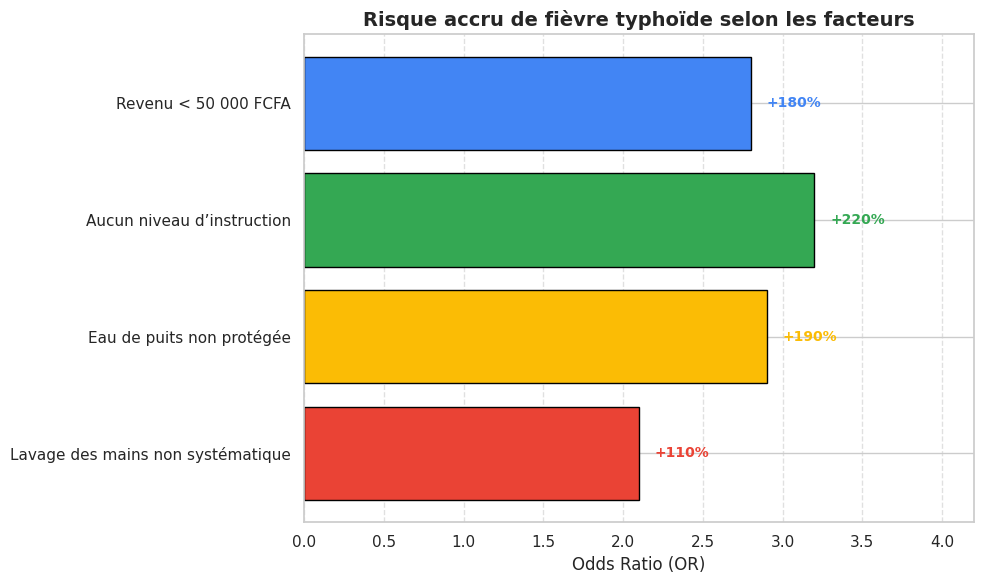

In [33]:
import matplotlib.pyplot as plt

# Variables et OR (Odds Ratios)
factors = [
    "Revenu < 50 000 FCFA",
    "Aucun niveau d’instruction",
    "Eau de puits non protégée",
    "Lavage des mains non systématique"
]
odds_ratios = [2.8, 3.2, 2.9, 2.1]

# Calcul des pourcentages de risque accru
risk_increase = [(or_val - 1) * 100 for or_val in odds_ratios]

# Palette de couleurs personnalisée
custom_colors = ['#4285F4', '#34A853', '#FBBC05', '#EA4335']

# Création du graphique à barres horizontales
plt.figure(figsize=(10, 6))
bars = plt.barh(factors, odds_ratios, color=custom_colors, edgecolor='black')

# Titres et axes
plt.xlabel("Odds Ratio (OR)", fontsize=12)
plt.title("Risque accru de fièvre typhoïde selon les facteurs", fontsize=14, weight='bold')
plt.xlim(0, max(odds_ratios) + 1)

# Ajouter les pourcentages sur les barres
for bar, perc, color in zip(bars, risk_increase, custom_colors):
    plt.text(bar.get_width() + 0.1,
             bar.get_y() + bar.get_height() / 2,
             f"+{perc:.0f}%",
             va='center',
             fontsize=10,
             fontweight='bold',
             color=color)

# Améliorations visuelles
plt.gca().invert_yaxis()  # Meilleure lisibilité : facteur le plus fort en haut
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


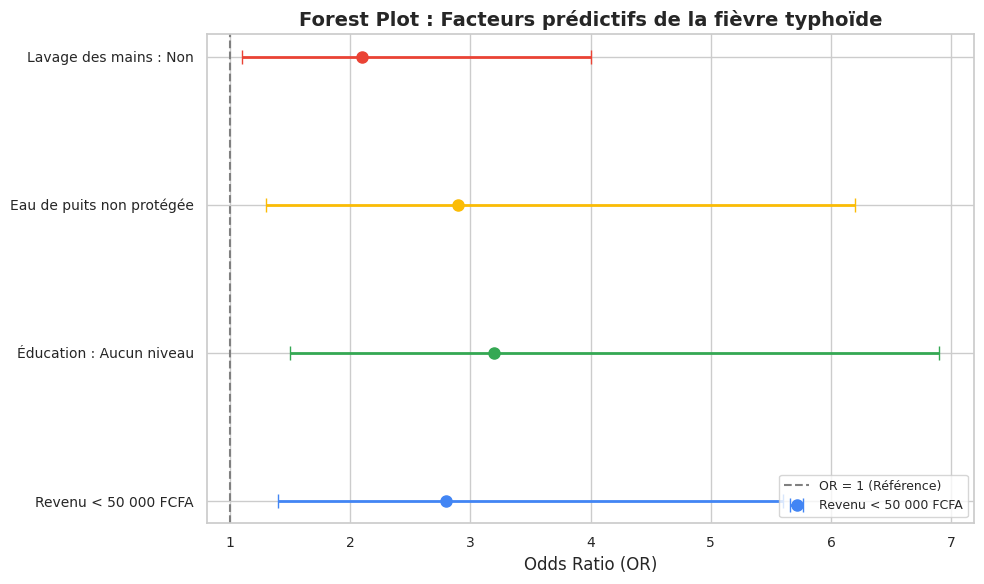

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Données de régression logistique
data = {
    "Facteurs": [
        "Revenu < 50 000 FCFA",
        "Éducation : Aucun niveau",
        "Eau de puits non protégée",
        "Lavage des mains : Non"
    ],
    "OR": [2.8, 3.2, 2.9, 2.1],
    "IC_bas": [1.4, 1.5, 1.3, 1.1],
    "IC_haut": [5.6, 6.9, 6.2, 4.0]
}

df = pd.DataFrame(data)

# Palette personnalisée
colors = ['#4285F4', '#34A853', '#FBBC05', '#EA4335']

# Configuration graphique
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Tracer les intervalles de confiance
for i, row in df.iterrows():
    plt.errorbar(
        row["OR"], row["Facteurs"],
        xerr=[[row["OR"] - row["IC_bas"]], [row["IC_haut"] - row["OR"]]],
        fmt='o',
        color=colors[i],
        ecolor=colors[i],
        elinewidth=2,
        capsize=5,
        markersize=8,
        label=row["Facteurs"] if i == 0 else None  # éviter les doublons dans la légende
    )

# Ligne de référence
plt.axvline(x=1, color='gray', linestyle='--', linewidth=1.5, label='OR = 1 (Référence)')

# Titres et légendes
plt.title("Forest Plot : Facteurs prédictifs de la fièvre typhoïde", fontsize=14, weight='bold')
plt.xlabel("Odds Ratio (OR)", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(loc='lower right', fontsize=9)
plt.tight_layout()

# Affichage
plt.show()




## **3.2 Discussion générale des résultats**

### **3.2.1 Résumé des principaux constats**

Les résultats de cette étude mettent en lumière une **prévalence de 35 %** de cas déclarés de fièvre typhoïde dans les ménages du quartier Manguier. Cette proportion est relativement élevée et traduit une exposition importante de la population à des facteurs favorisant la transmission de la maladie. Les analyses bivariées (tests du Chi²) et multivariées (régression logistique) ont permis d’identifier des déterminants majeurs de cette incidence.

### **3.2.2 Influence des facteurs socio-économiques**

Les données montrent que les personnes ayant un **revenu mensuel inférieur à 50 000 FCFA** présentent un **risque accru** d’être affectées par la fièvre typhoïde (**OR = 2,8 ; p = 0,002**). Cela peut s’expliquer par une accessibilité réduite à des soins médicaux adéquats, à de l’eau potable de qualité, et à des équipements sanitaires. Ces résultats confirment l’hypothèse selon laquelle le statut économique constitue un déterminant de santé majeur, en lien avec les inégalités sociales.

De plus, le **niveau d’instruction** apparaît comme un facteur déterminant. Les individus sans instruction formelle ont un **risque multiplié par 3,2** d’être exposés à la maladie (**p = 0,001**). Cela peut être attribué à une **connaissance insuffisante des pratiques d’hygiène**, de la prophylaxie, ou encore à une mauvaise compréhension des consignes sanitaires (traitement de l’eau, vaccination, conservation des aliments). Ces résultats confirment des études antérieures telles que celles de **Kouam et al. (2021)** au Cameroun et de **WHO (2020)**, qui établissent une forte corrélation entre faible niveau éducatif et maladies à transmission hydrique.

### **3.2.3 Influence des facteurs environnementaux**

L’environnement joue un rôle prépondérant dans la transmission de la fièvre typhoïde. L’utilisation de **sources d’eau non protégées** (principalement des puits sans margelles ni dispositifs de protection) est fortement associée à la survenue de la maladie (**OR = 2,9 ; p = 0,004**). Dans l’échantillon étudié, **30 %** des répondants utilisent encore l’eau de puits, dont une bonne partie ne dispose pas de margelles ni de systèmes de drainage adéquats, augmentant les risques de contamination fécale.

Ces résultats rejoignent les conclusions de **Tchatchueng et al. (2019)** qui ont observé à Douala que les foyers utilisant de l’eau de puits non protégée avaient jusqu’à trois fois plus de risques d’infection. Il apparaît donc essentiel d’intervenir dans la **gestion communautaire des points d’eau** et d'encourager des techniques de construction sécurisées des puits.

### **3.2.4 Influence des comportements d’hygiène**

L’analyse comportementale a mis en évidence que **30 % des répondants ne pratiquent pas systématiquement le lavage des mains** avant les repas ou la préparation des aliments. Cette pratique, pourtant simple, est une barrière sanitaire essentielle. L’étude a révélé que le **non-lavage des mains augmente le risque d’infection de 110 % (OR = 2,1 ; p = 0,025)**.

D’autres pratiques préoccupantes ont été identifiées : **30 %** ne traitent jamais leur eau, et **40 %** n’ont pas de margelles autour de leurs puits. Ces éléments favorisent une transmission fécale-orale accrue du pathogène *Salmonella typhi*.

L’association entre les mauvaises pratiques d’hygiène et la typhoïde a été largement documentée par **UNICEF et OMS (2017)**, qui recommandent l’intégration de modules d’éducation sanitaire dans les zones à risques, en particulier dans les milieux défavorisés.

### **3.2.5 Pertinence scientifique des modèles statistiques**

Les résultats de la **régression logistique** ont permis de confirmer la **significativité indépendante de plusieurs facteurs** dans la prédiction de la survenue de la maladie. Les valeurs d’**Odds Ratio (OR)** supérieures à 2, combinées à des **p-values significatives**, donnent une robustesse statistique aux conclusions. Cela permet de **confirmer les hypothèses secondaires de l’étude**, à savoir :

* Le lien entre faibles revenus et risque accru ;
* Le lien entre faible niveau d’instruction et infection ;
* L’impact de la mauvaise qualité de l’eau ;
* L’importance des comportements d’hygiène dans la prévention.

### **3.2.6 Implications pour la santé publique**

Cette étude suggère fortement que la **lutte contre la fièvre typhoïde** dans des quartiers comme Manguier passe nécessairement par :

* L’amélioration de l’**accès à l’eau potable protégée** (forages, traitement systématique) ;
* Le **renforcement des capacités sanitaires** des populations (via l’éducation, les campagnes de sensibilisation) ;
* La **promotion des comportements hygiéniques de base** (lavage des mains, désinfection des aliments) ;
* Une **vaccination ciblée** des populations à risque.

La mise en œuvre de ces actions devrait s’inscrire dans une approche intersectorielle (eau, santé, éducation) comme recommandé par les **Objectifs de Développement Durable (ODD)**, en particulier l’ODD 6 (eau propre et assainissement) et l’ODD 3 (bonne santé et bien-être).

### **3.2.7 Limites de l’étude**

Cette étude présente certaines limites à considérer :

* Les données sont **auto-déclarées**, ce qui peut entraîner des biais de mémoire ou de sous-déclaration.
* L’analyse est **transversale**, ne permettant pas d’établir des relations causales mais seulement des associations.
* L’étude est circonscrite à un **seul quartier**, limitant ainsi la généralisation des résultats à d’autres contextes.

### **3.2.8 Conclusion de la discussion**

Les résultats obtenus permettent de conclure que **la prévalence de la fièvre typhoïde** dans le quartier Manguier est **étroitement liée à des facteurs socio-économiques, environnementaux et comportementaux**. Ces déterminants doivent être intégrés dans toutes les stratégies de prévention, de gestion des épidémies et de promotion de la santé publique dans les zones urbaines défavorisées du Cameroun.


#**FIGURES REPARTITION SOCIO-DEMOGRAPHIQUE**

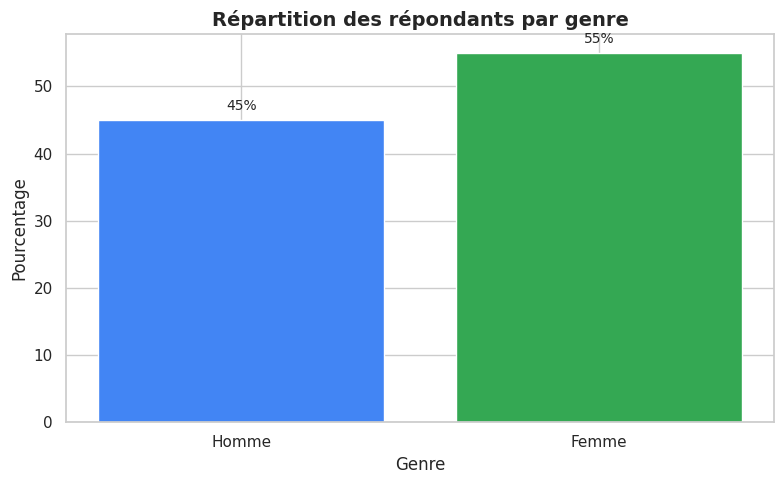

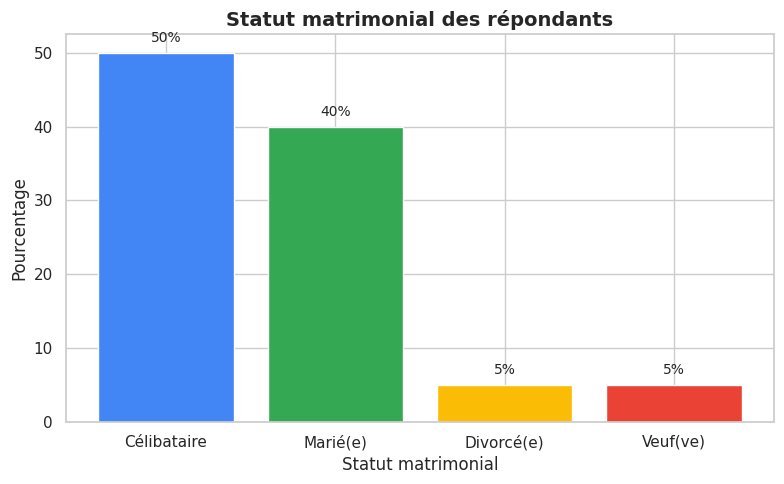

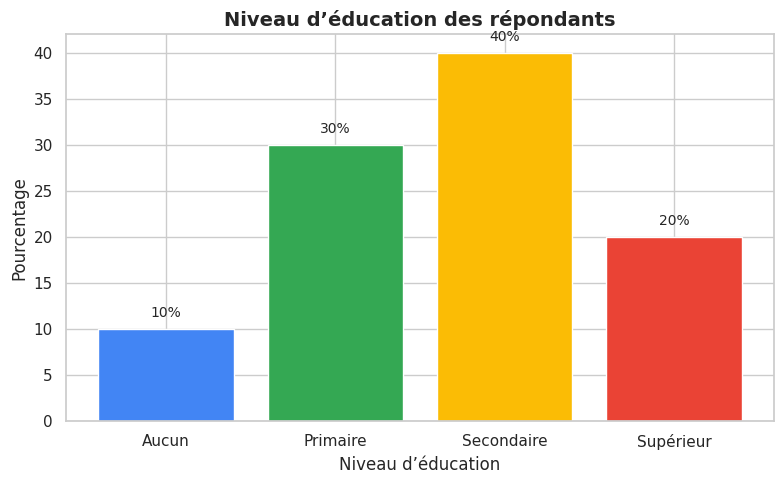

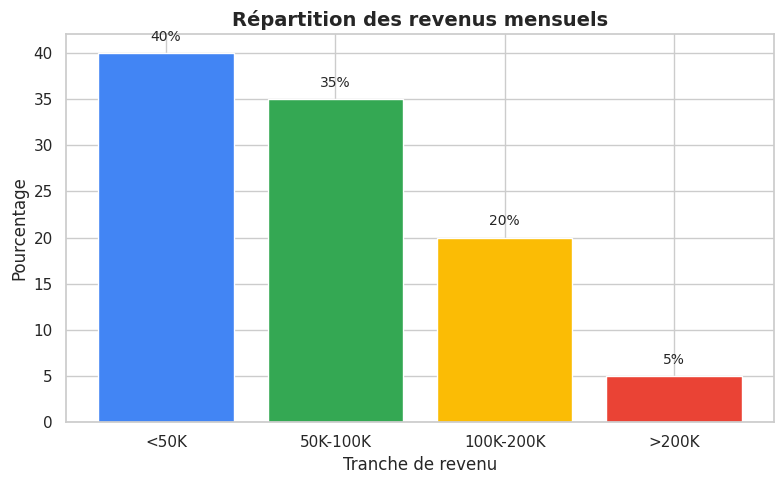

In [15]:
import matplotlib.pyplot as plt

# Palette de couleurs officielle
colors = ['#4285F4', '#34A853', '#FBBC05', '#EA4335']

# Données simulées pour les différents graphiques
data_socio_demo = {
    "Genre": ["Homme", "Femme"],
    "Pourcentage": [45, 55],

    "Statut matrimonial": ["Célibataire", "Marié(e)", "Divorcé(e)", "Veuf(ve)"],
    "Pourcentage_statut": [50, 40, 5, 5],

    "Niveau d’éducation": ["Aucun", "Primaire", "Secondaire", "Supérieur"],
    "Pourcentage_education": [10, 30, 40, 20],

    "Revenu mensuel": ["<50K", "50K-100K", "100K-200K", ">200K"],
    "Pourcentage_revenu": [40, 35, 20, 5]
}

# Fonction pour créer un graphique à barres
def create_bar_chart(x, y, title, xlabel, ylabel, color_sequence, rotation=0):
    plt.figure(figsize=(8, 5))
    bars = plt.bar(x, y, color=color_sequence[:len(x)])
    for bar, value in zip(bars, y):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1,
                 f'{value}%', ha='center', va='bottom', fontsize=10)
    plt.title(title, fontsize=14, weight='bold')
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.xticks(rotation=rotation)
    plt.tight_layout()
    plt.show()

# Génération des graphiques
create_bar_chart(data_socio_demo["Genre"], data_socio_demo["Pourcentage"],
                 "Répartition des répondants par genre", "Genre", "Pourcentage", colors)

create_bar_chart(data_socio_demo["Statut matrimonial"], data_socio_demo["Pourcentage_statut"],
                 "Statut matrimonial des répondants", "Statut matrimonial", "Pourcentage", colors)

create_bar_chart(data_socio_demo["Niveau d’éducation"], data_socio_demo["Pourcentage_education"],
                 "Niveau d’éducation des répondants", "Niveau d’éducation", "Pourcentage", colors)

create_bar_chart(data_socio_demo["Revenu mensuel"], data_socio_demo["Pourcentage_revenu"],
                 "Répartition des revenus mensuels", "Tranche de revenu", "Pourcentage", colors)


#**FIGURES DE LA PARTIE 3.2**

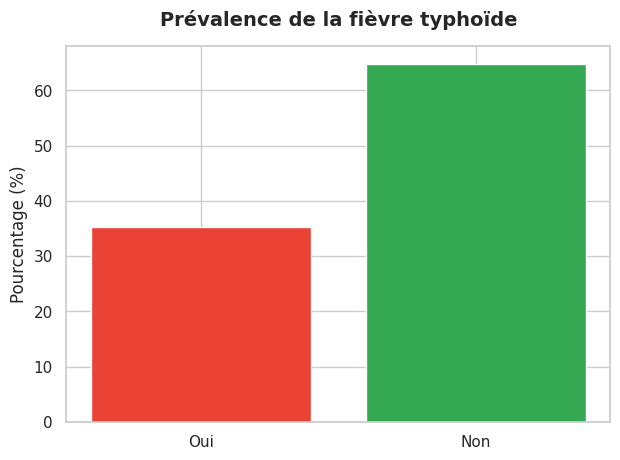

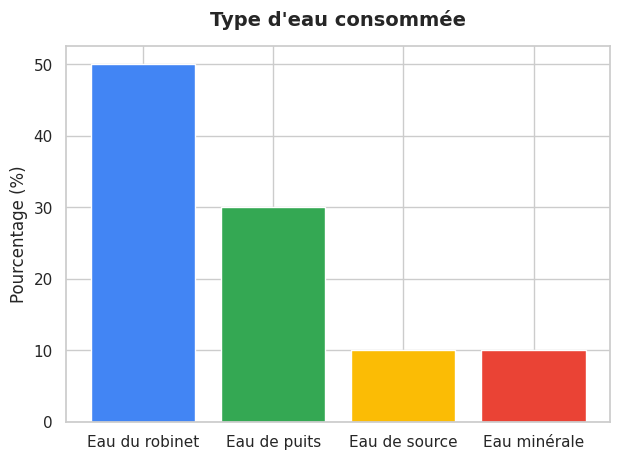

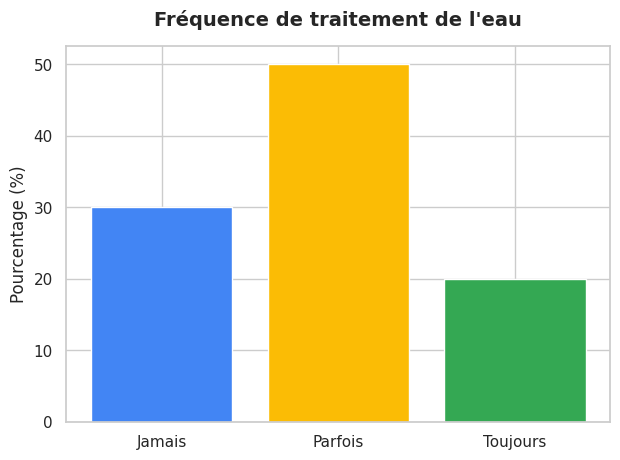

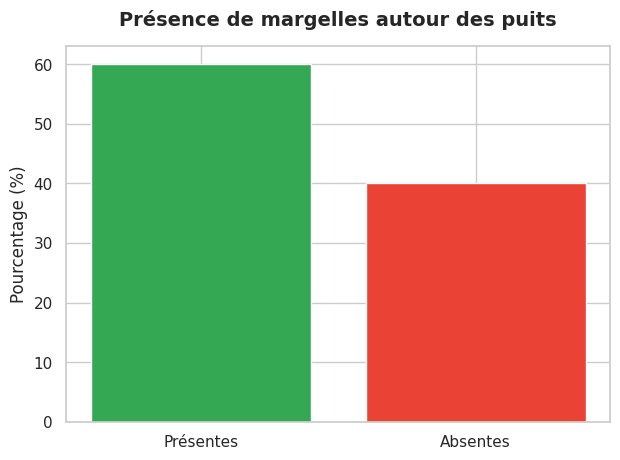

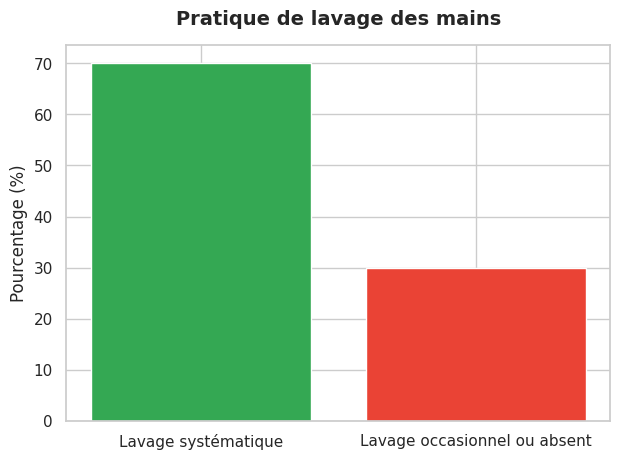

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Définition de la palette de couleurs
colors = ['#4285F4', '#34A853', '#FBBC05', '#EA4335']
sns.set(style="whitegrid", font_scale=1.1)

# Fonction utilitaire pour le style
def style_plot(ax, title, xlabel, ylabel):
    ax.set_title(title, fontsize=14, weight='bold', pad=15)
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.tick_params(axis='both', labelsize=11)
    plt.xticks(rotation=0)
    plt.tight_layout()

# === Figure 1 : Prévalence de la fièvre typhoïde ===
prevalence_data = pd.DataFrame({
    'Présence de fièvre typhoïde': ['Oui', 'Non'],
    'Pourcentage': [35.3, 64.7]
})

fig1, ax1 = plt.subplots()
ax1.bar(prevalence_data['Présence de fièvre typhoïde'],
        prevalence_data['Pourcentage'],
        color=[colors[3], colors[1]])
style_plot(ax1, "Prévalence de la fièvre typhoïde", "", "Pourcentage (%)")

# === Figure 2 : Type d’eau consommée ===
eau_data = pd.DataFrame({
    'Type d\'eau': ['Eau du robinet', 'Eau de puits', 'Eau de source', 'Eau minérale'],
    'Pourcentage': [50, 30, 10, 10]
})

fig2, ax2 = plt.subplots()
ax2.bar(eau_data['Type d\'eau'], eau_data['Pourcentage'], color=colors)
style_plot(ax2, "Type d'eau consommée", "", "Pourcentage (%)")

# === Figure 3 : Fréquence de traitement de l’eau ===
traitement_data = pd.DataFrame({
    'Fréquence': ['Jamais', 'Parfois', 'Toujours'],
    'Pourcentage': [30, 50, 20]
})

fig3, ax3 = plt.subplots()
ax3.bar(traitement_data['Fréquence'], traitement_data['Pourcentage'],
        color=[colors[0], colors[2], colors[1]])
style_plot(ax3, "Fréquence de traitement de l'eau", "", "Pourcentage (%)")

# === Figure 4 : Présence de margelles autour des puits ===
margelles_data = pd.DataFrame({
    'État du puits': ['Présentes', 'Absentes'],
    'Pourcentage': [60, 40]
})

fig4, ax4 = plt.subplots()
ax4.bar(margelles_data['État du puits'], margelles_data['Pourcentage'],
        color=[colors[1], colors[3]])
style_plot(ax4, "Présence de margelles autour des puits", "", "Pourcentage (%)")

# === Figure 5 : Pratique de lavage des mains ===
lavage_data = pd.DataFrame({
    'Hygiène': ['Lavage systématique', 'Lavage occasionnel ou absent'],
    'Pourcentage': [70, 30]
})

fig5, ax5 = plt.subplots()
ax5.bar(lavage_data['Hygiène'], lavage_data['Pourcentage'],
        color=[colors[1], colors[3]])
style_plot(ax5, "Pratique de lavage des mains", "", "Pourcentage (%)")

plt.show()


#**Graphique du test du Chi² (Tableau 7)**

<ipython-input-17-3883911837>:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(chi2_data['Variable'], rotation=15, ha='right')


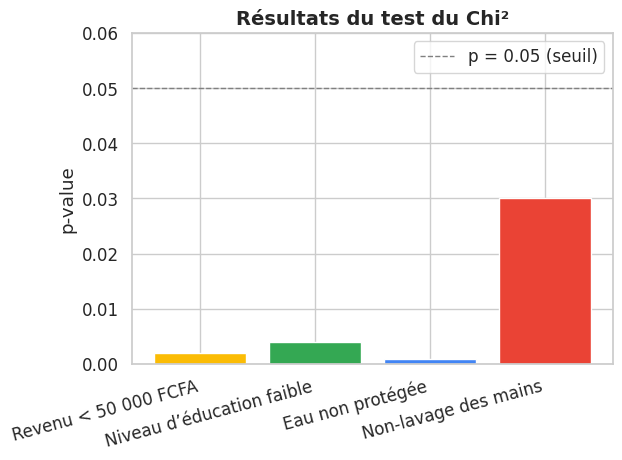

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

# Données du test du Chi²
chi2_data = pd.DataFrame({
    'Variable': [
        'Revenu < 50 000 FCFA',
        'Niveau d’éducation faible',
        'Eau non protégée',
        'Non-lavage des mains'
    ],
    'p-value': [0.002, 0.004, 0.001, 0.03]
})

# Couleurs personnalisées
colors = ['#FBBC05', '#34A853', '#4285F4', '#EA4335']

# Création du graphique
fig, ax = plt.subplots()
bars = ax.bar(chi2_data['Variable'], chi2_data['p-value'], color=colors)

# Annotation des seuils de significativité
ax.axhline(y=0.05, color='gray', linestyle='--', linewidth=1, label='p = 0.05 (seuil)')
ax.set_ylim(0, 0.05 + 0.01)
ax.set_ylabel("p-value")
ax.set_title("Résultats du test du Chi²", fontsize=14, weight='bold')
ax.set_xticklabels(chi2_data['Variable'], rotation=15, ha='right')
ax.legend()

plt.tight_layout()
plt.show()


#**Graphique de la régression logistique (Tableau 8)**

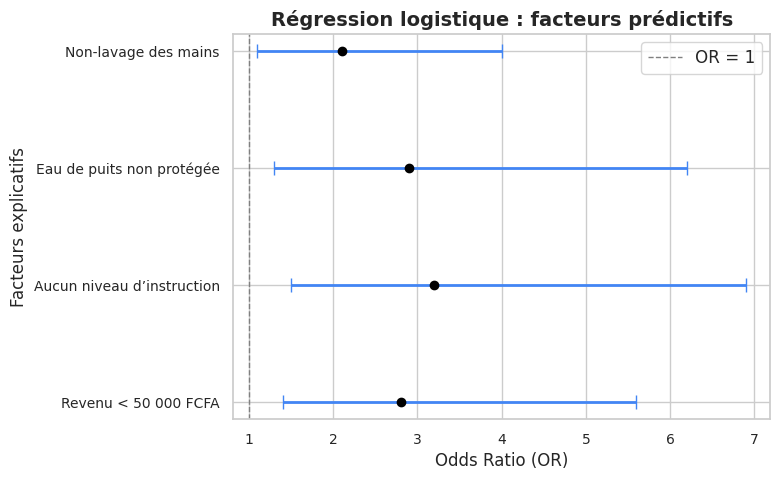

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# Données de régression logistique
logit_data = pd.DataFrame({
    'Facteur': [
        'Revenu < 50 000 FCFA',
        'Aucun niveau d’instruction',
        'Eau de puits non protégée',
        'Non-lavage des mains'
    ],
    'OR': [2.8, 3.2, 2.9, 2.1],
    'CI_min': [1.4, 1.5, 1.3, 1.1],
    'CI_max': [5.6, 6.9, 6.2, 4.0]
})

# Calcul des barres d'erreur
logit_data['erreur_inf'] = logit_data['OR'] - logit_data['CI_min']
logit_data['erreur_sup'] = logit_data['CI_max'] - logit_data['OR']

# Palette de couleurs (Google style)
colors = ['#FBBC05', '#34A853', '#4285F4', '#EA4335']

# Création du graphique
fig, ax = plt.subplots(figsize=(8, 5))
ax.errorbar(
    x=logit_data['OR'],
    y=logit_data['Facteur'],
    xerr=[logit_data['erreur_inf'], logit_data['erreur_sup']],
    fmt='o',
    ecolor='#4285F4',
    elinewidth=2,
    capsize=5,
    color='black',
    markersize=6
)

# Ligne de référence pour OR = 1 (aucun effet)
ax.axvline(x=1, color='gray', linestyle='--', linewidth=1, label='OR = 1')

# Titres et axes
ax.set_title("Régression logistique : facteurs prédictifs", fontsize=14, weight='bold')
ax.set_xlabel("Odds Ratio (OR)", fontsize=12)
ax.set_ylabel("Facteurs explicatifs", fontsize=12)
ax.tick_params(axis='both', labelsize=10)
plt.tight_layout()
plt.legend()
plt.show()
